# Sepsis Classification Machine Learning Project

## Business Understanding

# Sepsis Overview

Sepsis is a life-threatening condition resulting from the body's extreme response to an infection, leading to widespread inflammation, organ damage, and potential organ failure. Triggered by various infections, sepsis requires prompt medical attention. Symptoms include fever, rapid heart rate, breathing issues, low blood pressure, and altered mental status. Treatment involves antibiotics, intravenous fluids, and supportive care. Early detection is crucial for a better prognosis.

This project focuses on early sepsis detection and classification, a critical aspect of healthcare. Timely identification of sepsis significantly enhances patient outcomes. The goal is to develop a robust machine learning model for sepsis classification and deploy it as a web application using FastAPI, enabling real-time predictions.

### 1.1. Objectives
#### Understand the Data:
Gain a comprehensive understanding of patient data, encompassing health-related features, demographics, and sepsis presence or absence. This knowledge empowers healthcare professionals to make informed decisions about patient care and intervention.

#### Predict Sepsis:
Develop a precise machine learning classification model predicting the likelihood of sepsis based on provided features. Early and accurate sepsis prediction is crucial for timely medical intervention, enhancing patient outcomes.

#### Web Application Integration:
Integrate the trained sepsis classification model into a web application using FastAPI. This application serves as a practical tool for healthcare practitioners to input patient data and receive real-time sepsis risk predictions, aiding in clinical decision-making.

### 1.2. Methodology
To achieve project objectives, follow a structured approach:

#### Data Understanding:
Explore patient data, including age, vital signs, and medical history, to gain insights and identify data quality issues.

#### Data Preparation:
Handle missing values, perform feature engineering, and encode categorical variables as needed to prepare data for machine learning model training.

#### Model Development:
Select and implement a suitable machine learning classification model for sepsis prediction. Train the model on historical patient data to identify patterns indicative of sepsis.

#### Model Evaluation:
Assess model performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC. Rigorous evaluation identifies the model's effectiveness in predicting sepsis cases.

#### FastAPI Integration:
Integrate the trained machine learning model into a FastAPI-based web application, offering a user-friendly interface for healthcare professionals to input patient data and obtain sepsis risk predictions.

#### Testing and Validation:
Conduct thorough testing and validation of the web application to ensure reliability and accuracy in real-time sepsis risk assessment.

#### Documentation:
Provide detailed documentation on using the web application, including input requirements and result interpretation.

By following this methodology, the project aims to offer healthcare professionals a valuable tool for early sepsis detection and decision support, ultimately contributing to improved patient care and outcomes.

### Import the necessary modules/packages

In [65]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scipy
%pip install scikit-learn
%pip install imbalanced-learn
%pip install xgboost
%pip install Jinja2
%pip install nbformat --upgrade

  Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.7.4-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.7 kB)
  Using cached contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached cy

In [66]:
# Data manipulation packages
import pandas as pd
import numpy as np

#Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Handling class imbalance by oversampling
from imblearn.over_sampling import SMOTE 

# Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Other Packages
import warnings
warnings.filterwarnings("ignore")

import joblib
import os

## Data Understanding

In [67]:
df = pd.read_csv("../data/Paitients_Files_Train.csv")

df_test = pd.read_csv("../data/Paitients_Files_Test.csv")

### Train Dataset

In [68]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## Understanding the Columns
1. **ID:**
   - Column representing a unique identifier for each patient.

2. **PRG (Plasma Glucose):**
   - Measurement of glucose concentration in the plasma.

3. **PL (Blood Work Result-1):**
   - A numeric result from the first blood work analysis (unit: mu U/ml).

4. **PR (Blood Pressure):**
   - Measurement of blood pressure in millimeters of mercury (mm Hg).

5. **SK (Blood Work Result-2):**
   - A numeric result from the second blood work analysis (unit: mm).

6. **TS (Blood Work Result-3):**
   - A numeric result from the third blood work analysis (unit: mu U/ml).

7. **M11 (Body Mass Index - BMI):**
   - Body mass index calculated as weight in kilograms divided by the square of height in meters.
   (weight in kg/(height in m)^2)

8. **BD2 (Blood Work Result-4):**
   - A numeric result from the fourth blood work analysis (unit: mu U/ml).

9. **Age:**
   - Age of the patient in years.

10. **Insurance:**
    - Binary indicator (Yes/No) representing whether a patient holds a valid insurance card.

11. **Sepsis:**
    - Target variable indicating whether a patient in the Intensive Care Unit (ICU) is predicted to develop sepsis (Positive) or not (Negative). This column is the focus of the classification task.


In [69]:
df.shape

(599, 11)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [71]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [73]:
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [74]:
df.duplicated().sum()

0

## Hypothesis

**Null Hypothesis (H0):**
"There is no significant age difference between patients with and without sepsis."

**Alternative Hypothesis (H1):**
"There is a significant age difference, indicating certain age groups are more prone to sepsis."

## Research Questions

1. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?

2. Are specific age groups more susceptible to developing sepsis, and can we establish age-related patterns in sepsis occurrence?

3. To what extent does the presence of insurance impact the likelihood of patients developing sepsis, and are there notable associations between insurance status and sepsis occurrence?

4. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?

5. How do various blood parameters relate to the occurrence of sepsis, and can specific bloodwork results be indicative of an increased risk of developing sepsis?

# __EDA__

### Univariate Analysis

In [75]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [76]:
sep_df=df['Sepssis'].value_counts(normalize=True)
sep_df

Sepssis
Negative    0.652755
Positive    0.347245
Name: proportion, dtype: float64

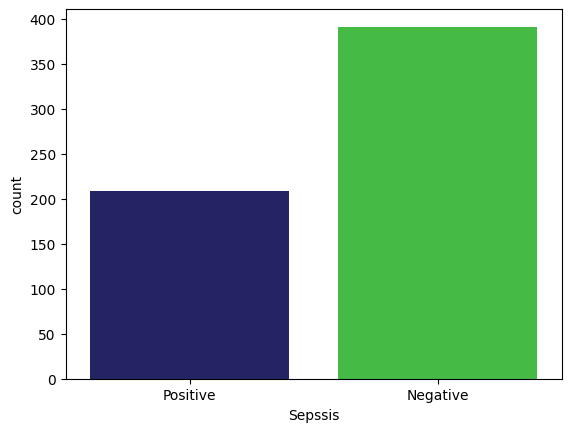

In [77]:
sns.countplot(data=df, x='Sepssis', palette=['midnightblue', 'limegreen'])
plt.show()

__The dataset seems imbalanced, with Negative sepsis cases being more than the positive sepsis cases__

In [78]:
insurance_df=df['Insurance'].value_counts(normalize=True)
insurance_df

Insurance
1    0.686144
0    0.313856
Name: proportion, dtype: float64

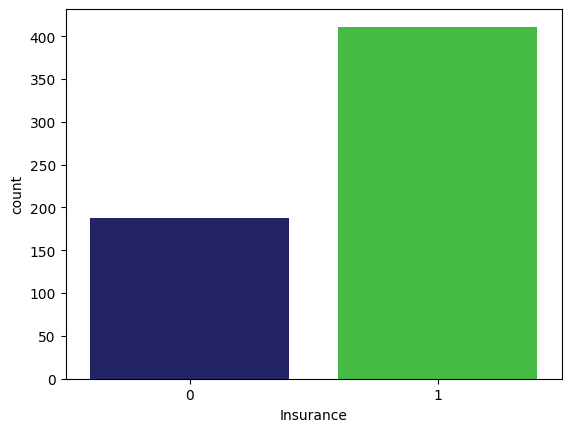

In [79]:
sns.countplot(data=df, x='Insurance', palette=['midnightblue', 'limegreen'])
plt.show()

__Patients with valid health insurance cover are more than those without a valid health insurance cover__

In [80]:
cols = [ 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

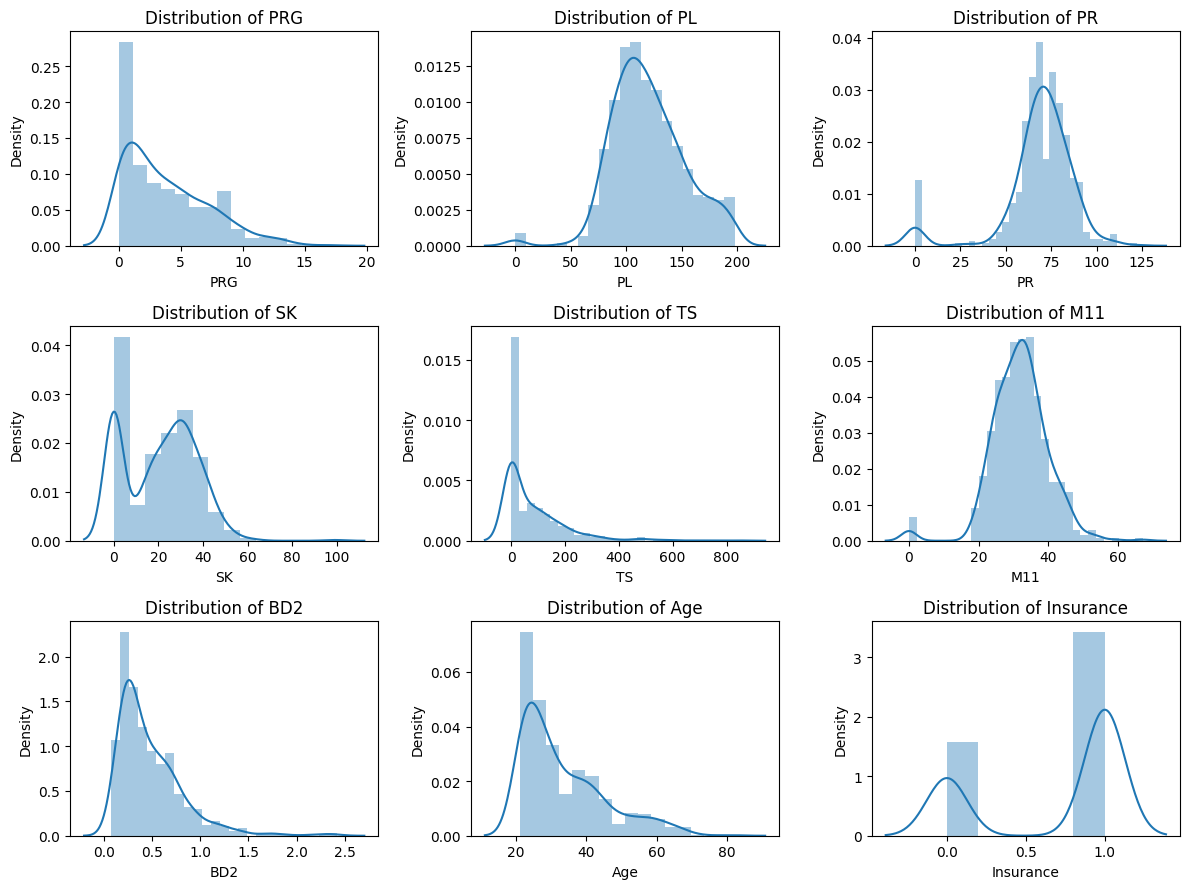

In [81]:
# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = (len(cols) + num_cols - 1) // num_cols  

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3 * num_rows))

# Plot histograms for specific columns
for i, col in enumerate(cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.distplot(df[col], kde=True,ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Distribution of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Density')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


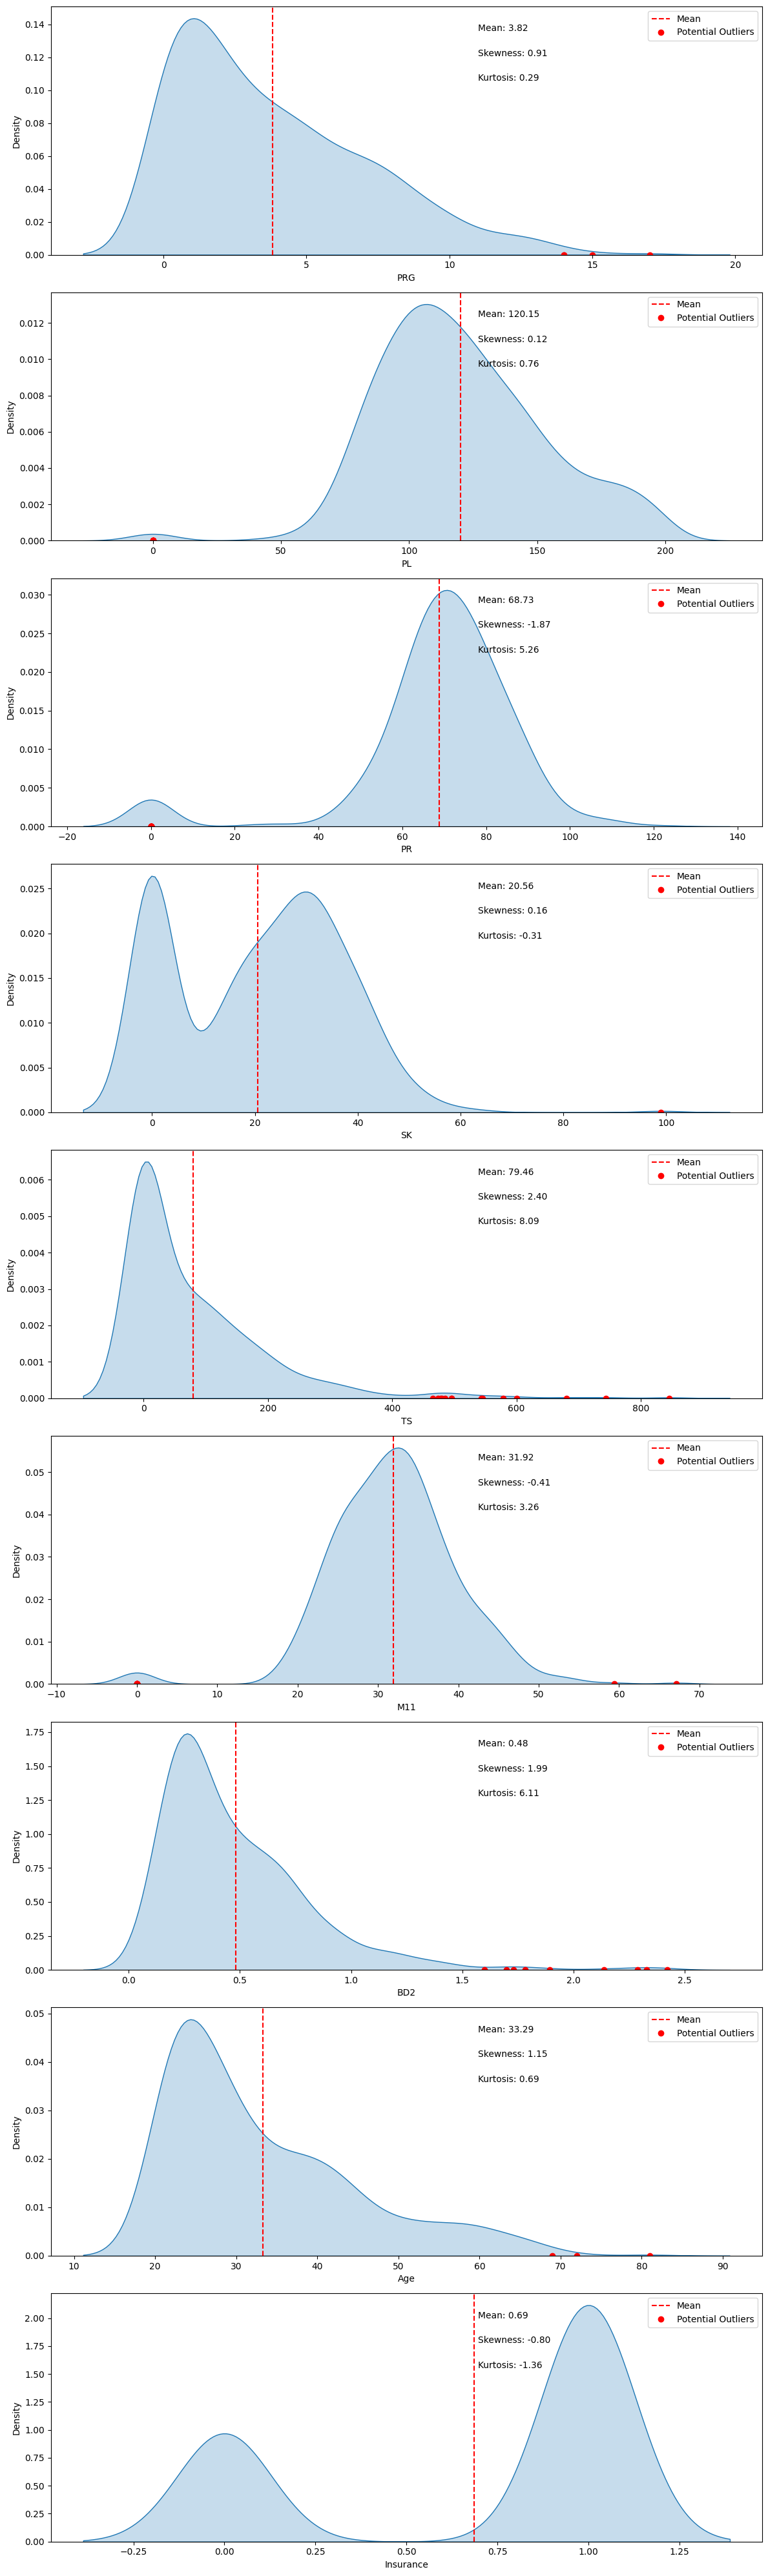

In [82]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(cols), figsize=(12, 40))
for i, col in enumerate(cols):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df[col].mean()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
    # Add mean line
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    
    # Add red dots to indicate potential outliers
    outliers = df[(df[col] > mean_val + 3 * df[col].std()) | (df[col] < mean_val - 3 * df[col].std())]
    axes[i].plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')
    
    # Add legend
    axes[i].legend()
    
plt.tight_layout()
plt.show()

__Kurtosis__ measures the "tailedness" of a distribution.

__Skewness__ measures the asymmetry of the distribution


1. **PRG (Plasma Glucose):**
   - The KDE plot shows a distribution with more values on the higher side, indicating positive skewness.
   - The plot is platykurtic, meaning it has a flatter peak and lighter tails compared to a normal distribution.

2. **PL (Blood Work Result-1):**
   - The KDE plot suggests a roughly symmetric distribution with an average (mean) value around 120.15.
   - The distribution is mesokurtic, implying a shape similar to a normal distribution.

3. **PR (Blood Pressure):**
   - The KDE plot indicates a negatively skewed distribution with a more peaked shape and possible outliers.

4. **SK (Blood Work Result-2):**
   - The KDE plot suggests a slightly positively skewed distribution with a flatter shape, implying fewer outliers or extreme values.

5. **TS (Blood Work Result-3):**
   - The KDE plot suggests a positively skewed distribution with a more peaked shape and heavier tails.
   - This means there's a higher frequency of lower values compared to higher values, and there might be more outliers.

6. **M11 (Body Mass Index - BMI):**
   - The KDE plot indicates a slightly negatively skewed distribution with a more peaked shape and heavier tails.
   - This means there's a higher frequency of higher BMI values compared to lower values, and there might be more outliers.

7. **BD2 (Blood Work Result-4):**
   - The KDE plot suggests a positively skewed distribution with a more peaked shape and heavier tails.
   - This indicates a higher frequency of extreme values or outliers, with the tail extending to the right.

8. **Age :**
- The KDE plot indicates a positively skewed distribution of age, with a higher frequency of younger individuals.
- This suggests that the distribution is more uniform, with a spread of values that doesn't exhibit significant outliers or extreme values. There is a higher concentration of younger individuals, and the tail of the distribution extends to the right, highlighting a prevalence of younger ages compared to older ones.


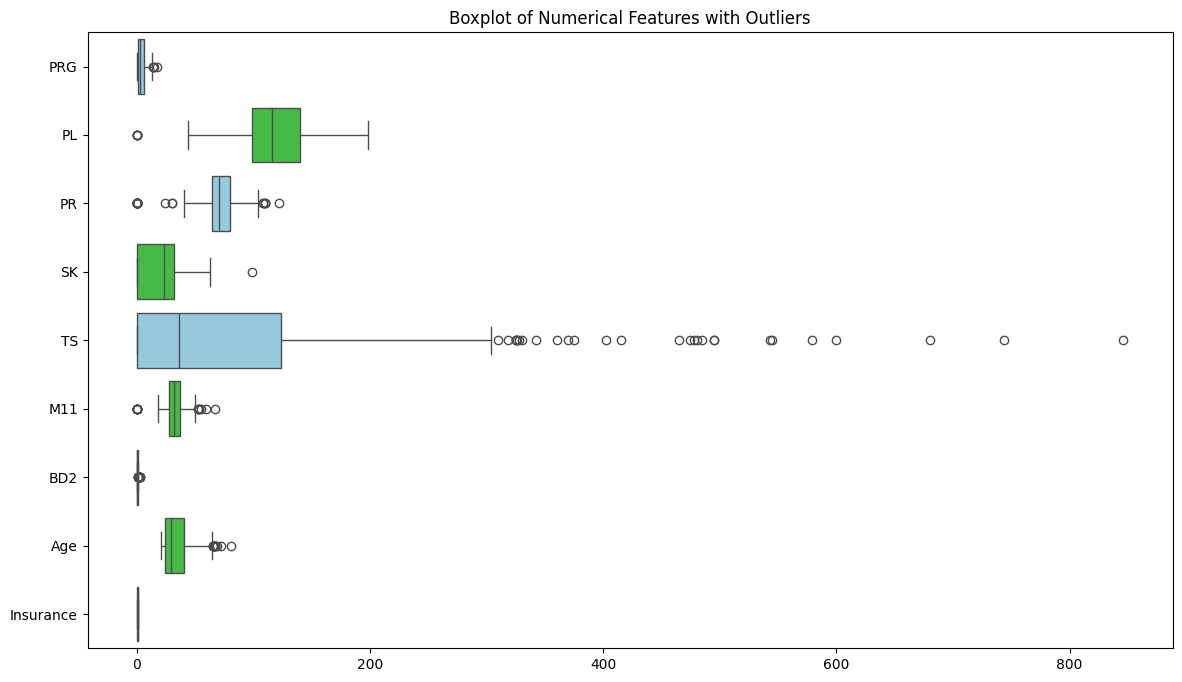

In [83]:
# Create a single boxplot to show outliers
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df[cols], whis=1.5, orient='h', palette=['skyblue', 'limegreen'])
plt.title("Boxplot of Numerical Features with Outliers")
plt.show()

Number of outliers in PRG: 4


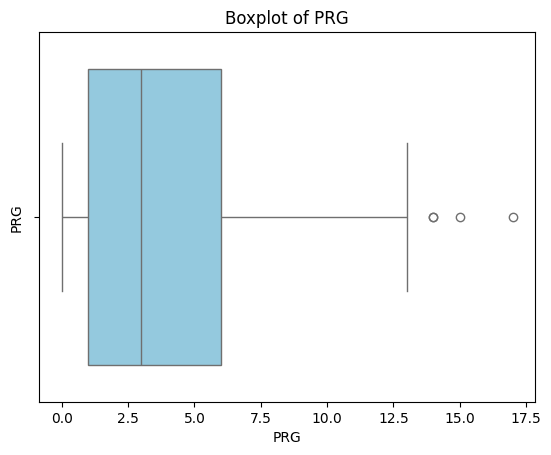

Number of outliers in PL: 0


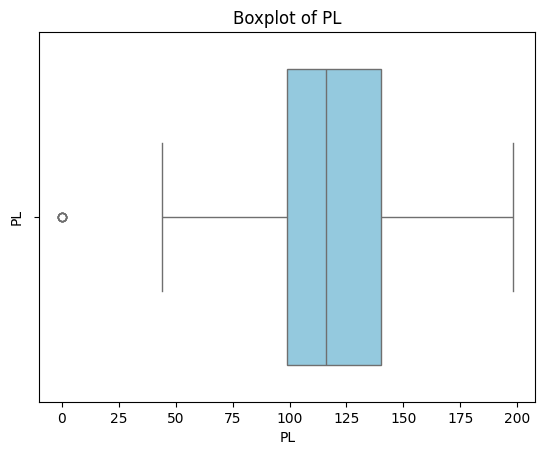

Number of outliers in PR: 6


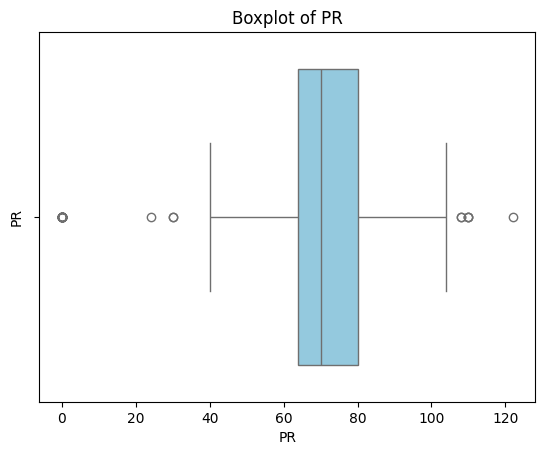

Number of outliers in SK: 1


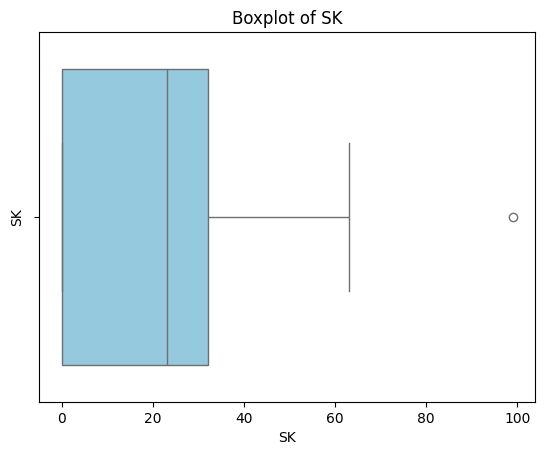

Number of outliers in TS: 28


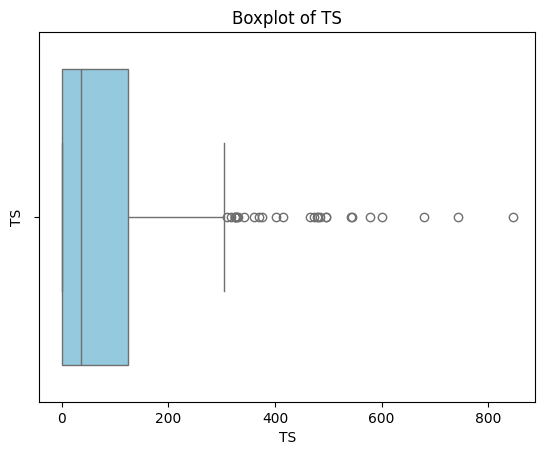

Number of outliers in M11: 7


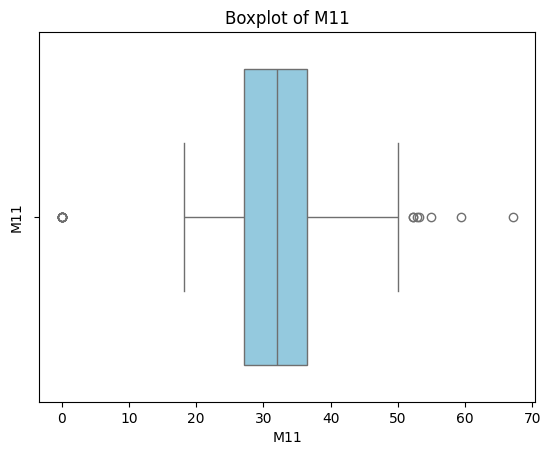

Number of outliers in BD2: 19


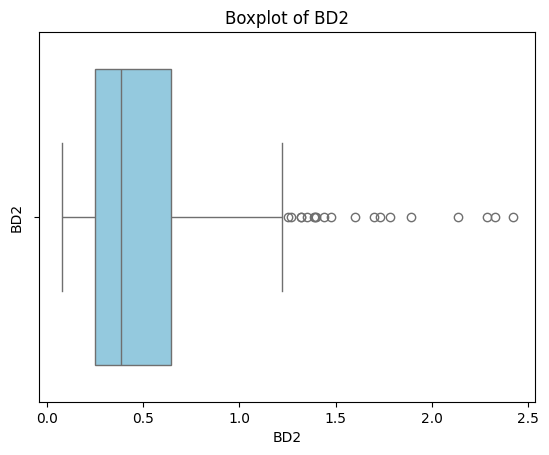

Number of outliers in Age: 12


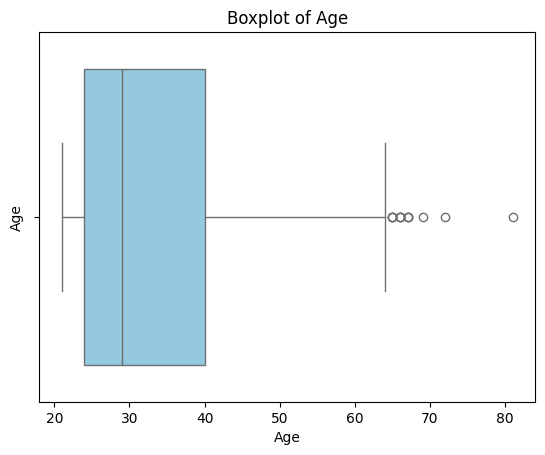

Number of outliers in Insurance: 0


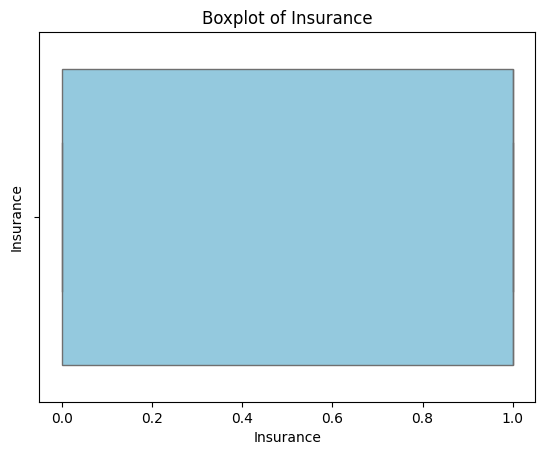

In [84]:
# # Create a box plot by Iterating over each numerical column
for col in cols:
    sns.boxplot(data = df[col],whis=1.5, orient='h',palette=['skyblue', 'limegreen'])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Get the outliers
    outliers = df[df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))]

    # Print the number of outliers
    num_outliers = len(outliers)
    print(f"Number of outliers in {col}: {num_outliers}")

    # Show the plot
    plt.show()

## Bivariate Analysis

In [85]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

In [86]:
cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

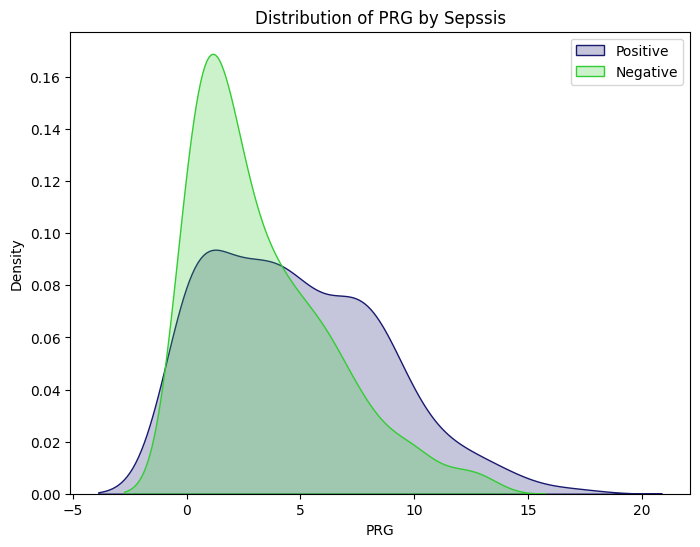

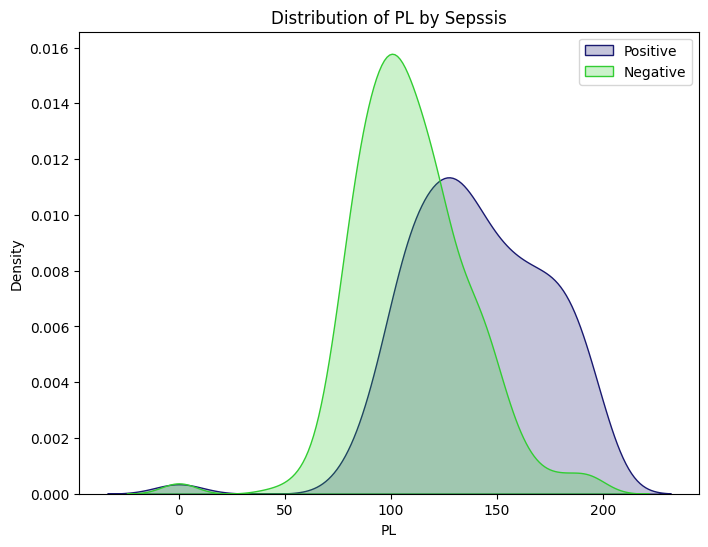

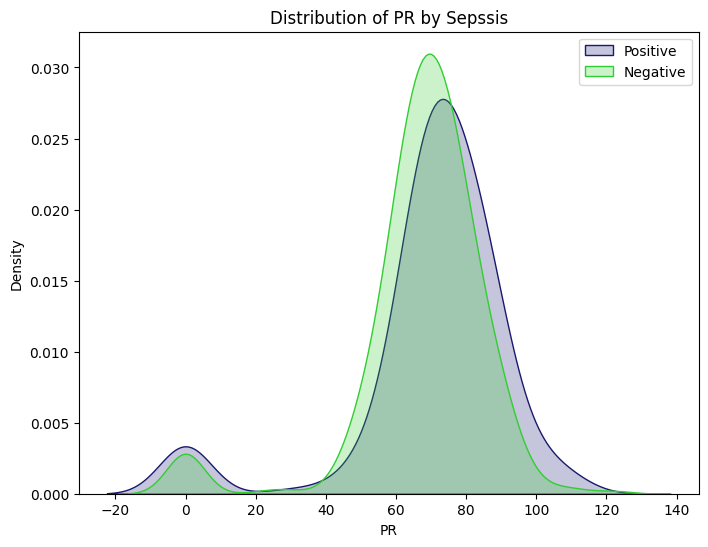

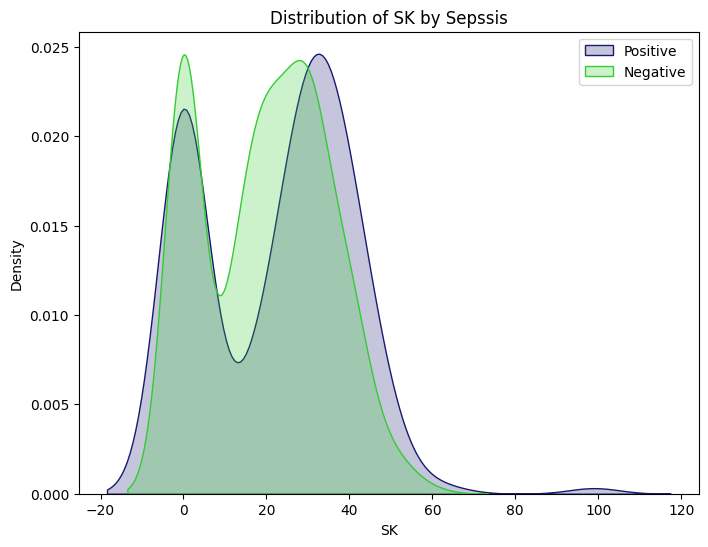

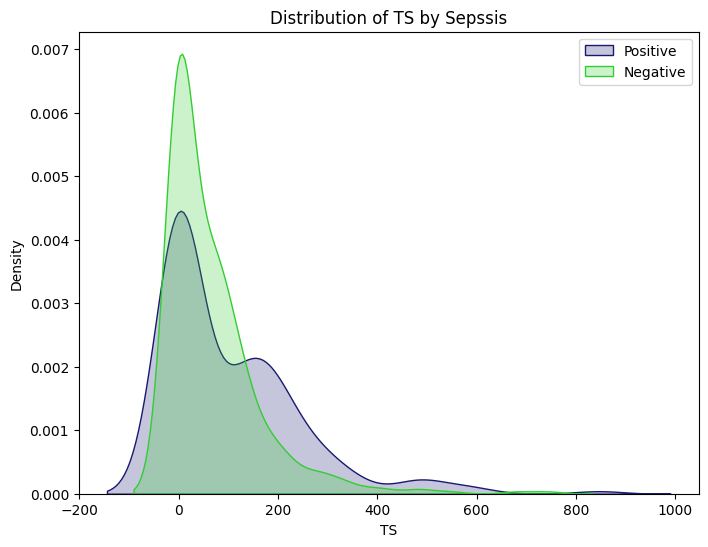

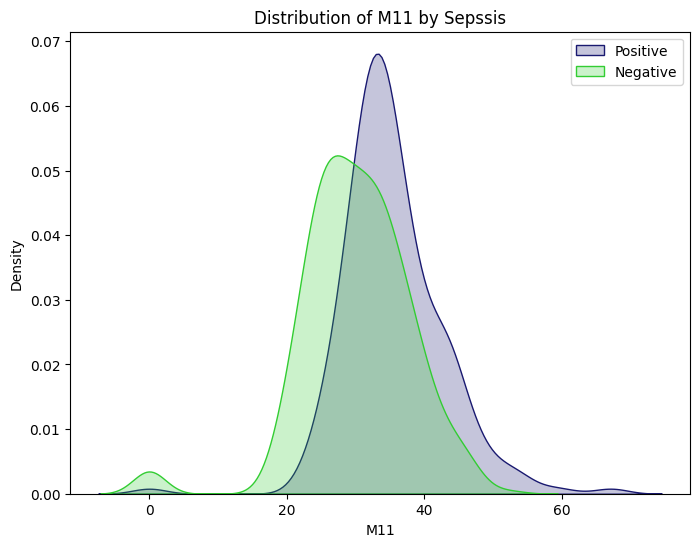

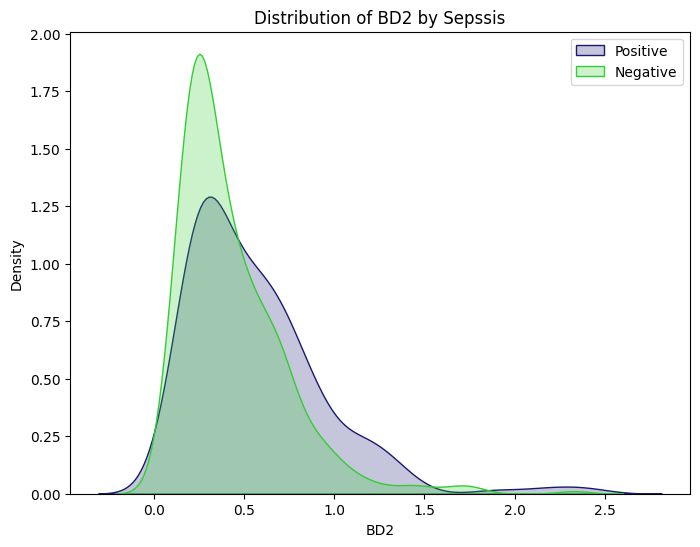

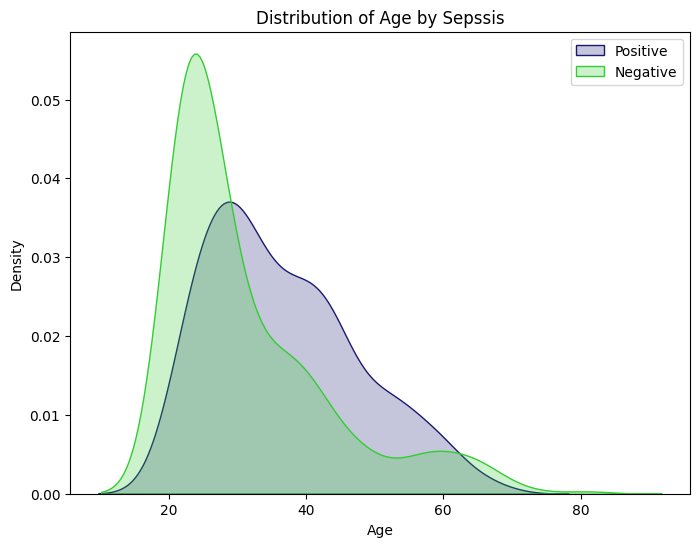

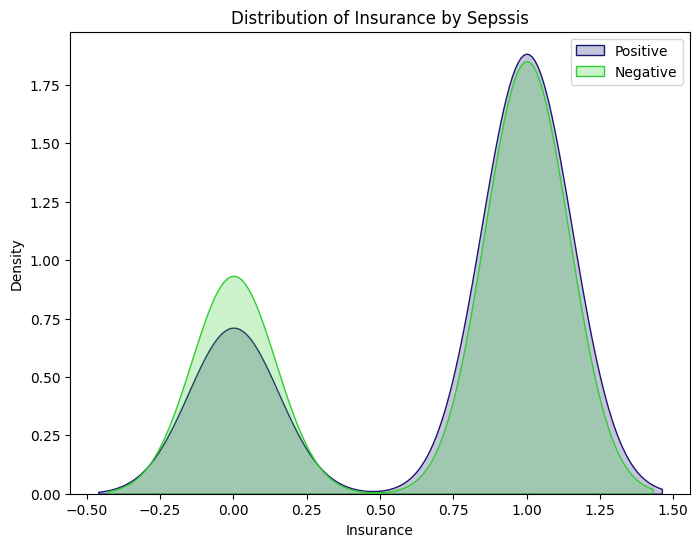

In [87]:
for i in cols:
    plt.figure(figsize=(8, 6))
    
    
    # Separate the data based on gender
    positive_data = df[df['Sepssis'] == 'Positive'][i]
    negative_data = df[df['Sepssis'] == 'Negative'][i]

    # Plot each gender's distribution
    sns.kdeplot(positive_data, shade=True, label='Positive',  color='midnightblue')
    sns.kdeplot(negative_data, shade=True, label='Negative', color='limegreen')

    plt.title(f'Distribution of {i} by Sepssis')
    plt.legend()
    plt.show()

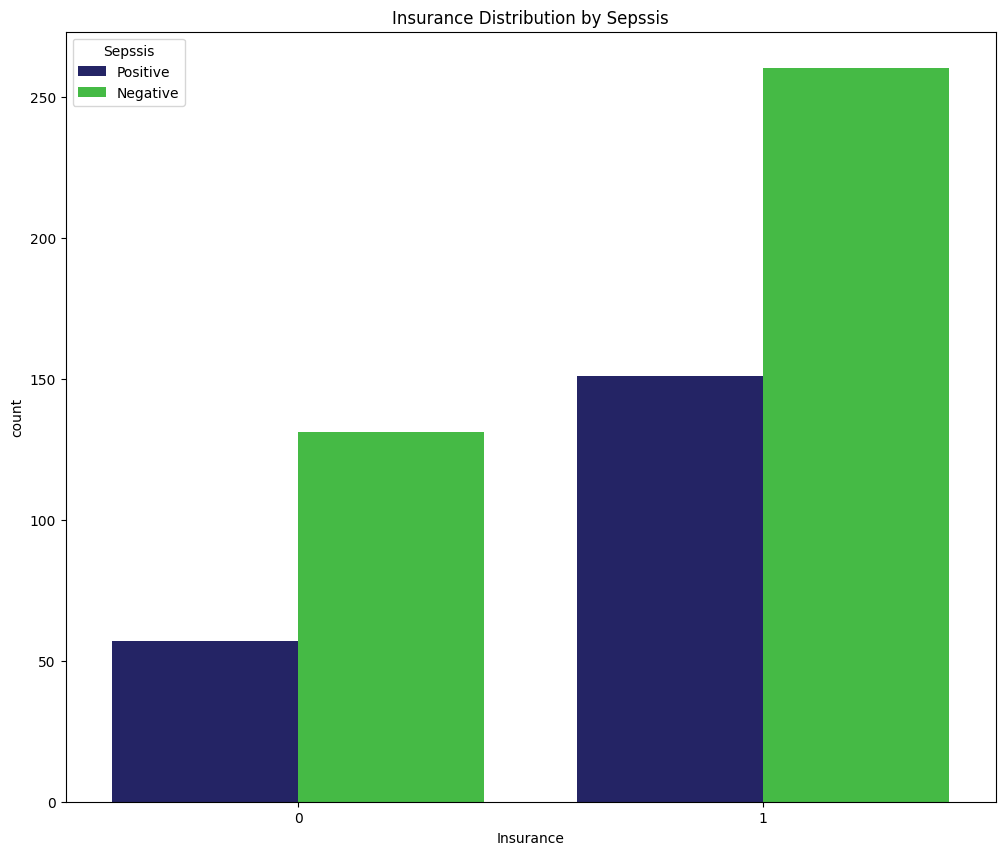

In [88]:
# Analysis for insurance column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Insurance', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Insurance Distribution by Sepssis')
plt.show()

    

In [89]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64])

In [90]:
df['Age'].max()

81

In [91]:
df['Age'].min()

21

In [92]:
# Define age bins
age_bins = [20,  40, 60,  80,  100]
age_labels = ["{0} - {1}".format(age_bins[i], age_bins[i + 1] - 1) for i in range(len(age_bins) - 1)]

# Create a new column 'Age Group' in your DataFrame
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the counts of each age group
df['age_group'].value_counts()

age_group
20 - 39    443
40 - 59    129
60 - 79     26
80 - 99      1
Name: count, dtype: int64

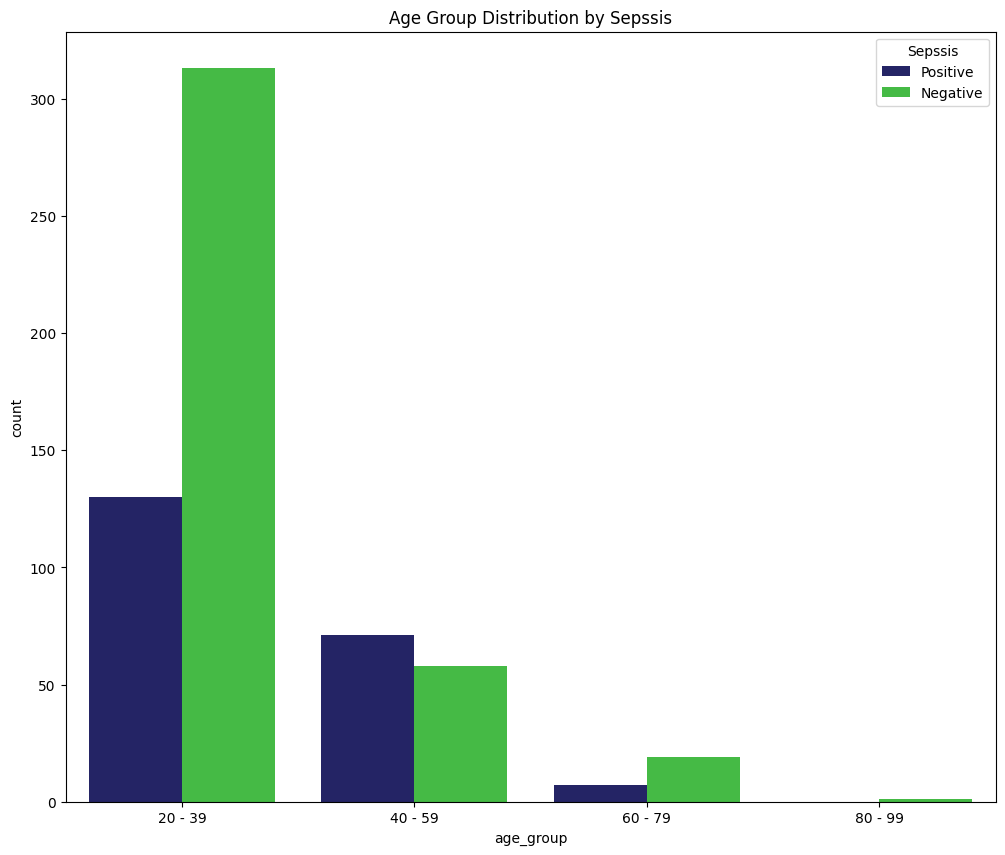

In [93]:
# Analysis for age_group column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='age_group', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Age Group Distribution by Sepssis')
plt.show()

In [94]:
# Define bins and labels
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create a new column 'BMI Category' in your DataFrame
df['BMI_category'] = pd.cut(df['M11'], bins=bmi_bins, labels=bmi_labels, right=False)

# Display the counts of each BMI category
df['BMI_category'].value_counts()

BMI_category
Obese          372
Overweight     136
Normal          78
Underweight     13
Name: count, dtype: int64

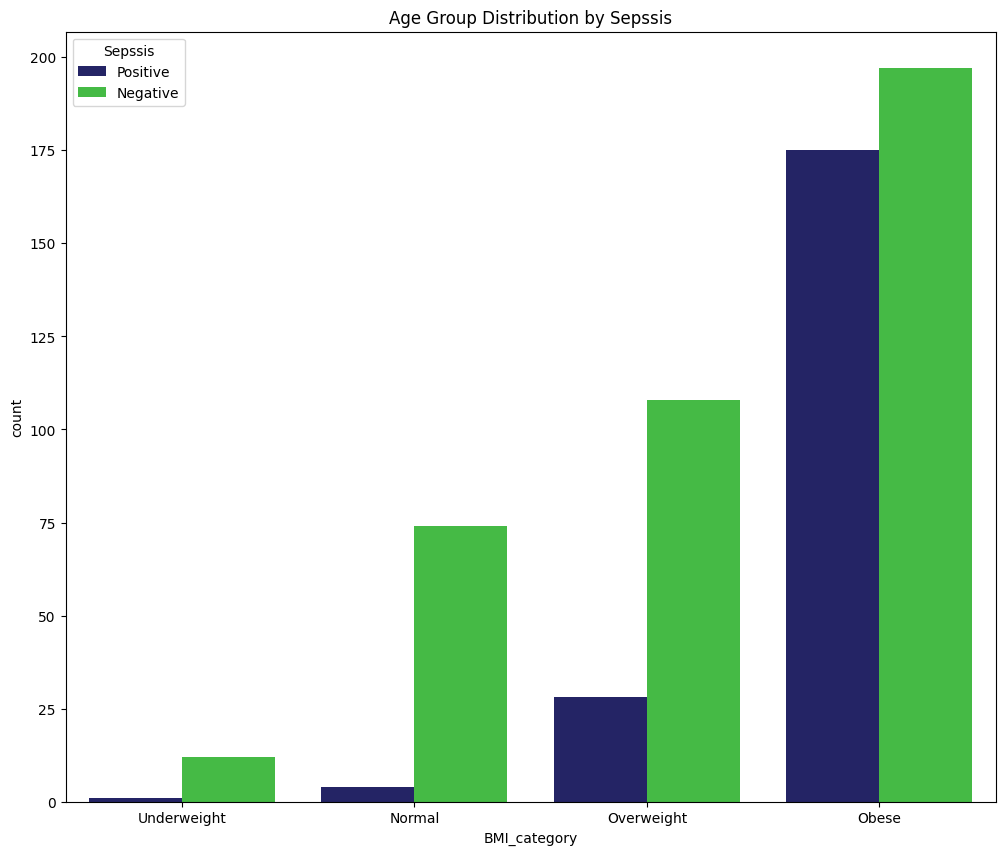

In [95]:
# Analysis for age_group column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='BMI_category', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Age Group Distribution by Sepssis')
plt.show()

## Multivariate Analysis

In [96]:
# Encoding the target variable
df['Sepssis_mapped'] = df['Sepssis'].map({'Negative': 0, 'Positive': 1})

In [97]:
df_corr = df.corr(numeric_only=True)

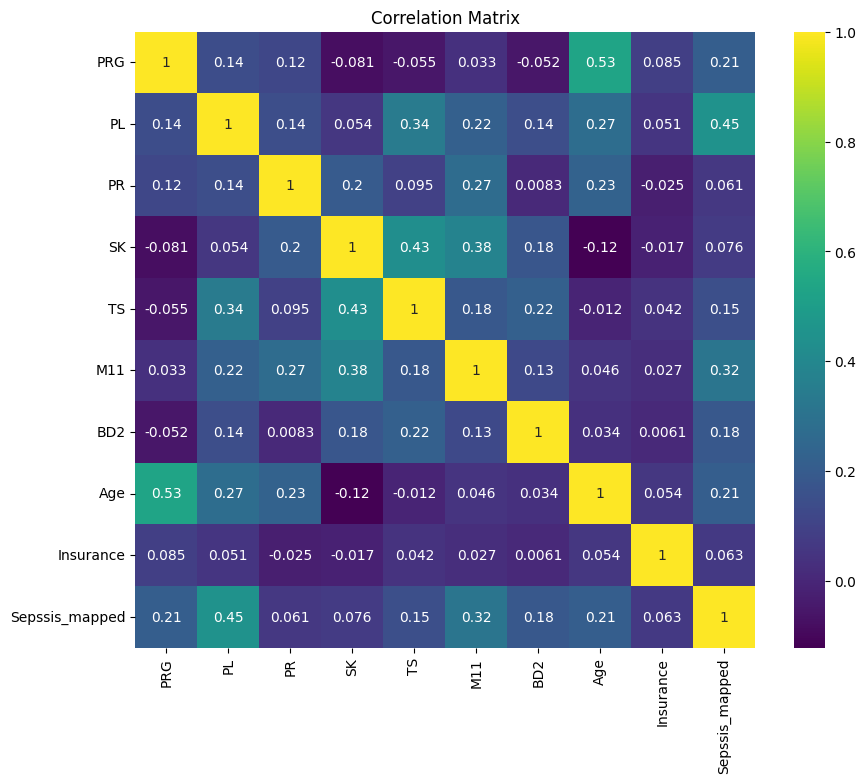

In [98]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

## Hypothesis

**Null Hypothesis (H0):**
"There is no significant age difference between patients with and without sepsis."

**Alternative Hypothesis (H1):**
"There is a significant age difference, indicating certain age groups are more prone to sepsis."

In [99]:
# Create a contingency table
contingency_table = pd.crosstab(df['age_group'], df['Sepssis'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check for statistical significance
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant age difference, indicating certain age groups are more prone to sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no significant age difference between patients with and without sepsis.")


Chi-square value: 30.370998857482984
P-value: 1.1530368447405031e-06
Reject the null hypothesis. There is a significant age difference, indicating certain age groups are more prone to sepsis.


- The low p-value allows us to reject the null hypothesis, suggesting that there is a significant association between Age Group and the occurrence of sepsis. Therefore, we have evidence to support the alternative hypothesis, indicating that certain age groups may be more prone to sepsis.

- In practical terms, this means that the distribution of sepsis cases is not uniform across different age groups, and age may indeed play a role in susceptibility to sepsis.


## Research Questions

1. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?

2. Are specific age groups more susceptible to developing sepsis, and can we establish age-related patterns in sepsis occurrence?

3. To what extent does the presence of insurance impact the likelihood of patients developing sepsis, and are there notable associations between insurance status and sepsis occurrence?

4. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?

5. How do various blood parameters relate to the occurrence of sepsis, and can specific bloodwork results be indicative of an increased risk of developing sepsis?

1. What is the prevalence of sepsis among the patient population, & identify factors contributing to the tendency of developing sepsis?

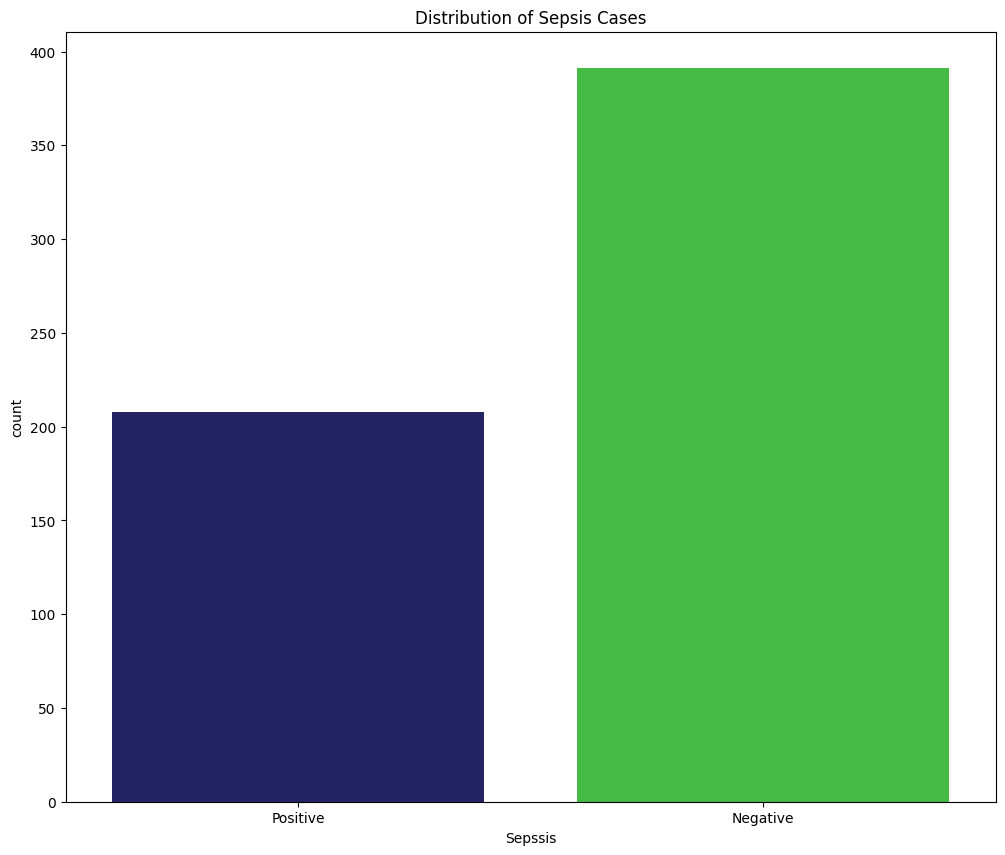

Prevalence of Sepsis: 34.72%


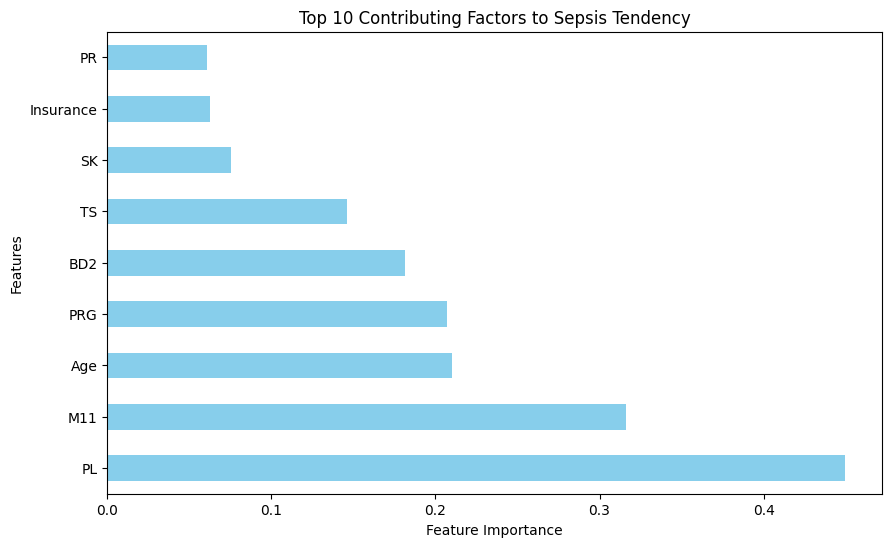

In [100]:
sep_df = df['Sepssis'].value_counts()
prevalence = sep_df[1] / df.shape[0] * 100

plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Sepssis', palette=['midnightblue', 'limegreen'])
plt.title('Distribution of Sepsis Cases')
plt.show()

print(f"Prevalence of Sepsis: {prevalence:.2f}%")

# Identify contributing factors using feature importance
features = df[cols]
target = df['Sepssis_mapped']

feature_importance = features.corrwith(target)
top_features = feature_importance.abs().nlargest(10)

# Horizontal bar plot for feature importance
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Contributing Factors to Sepsis Tendency')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


2. Are specific age groups more susceptible to developing sepsis, and can we establish age-related patterns in sepsis occurrence?

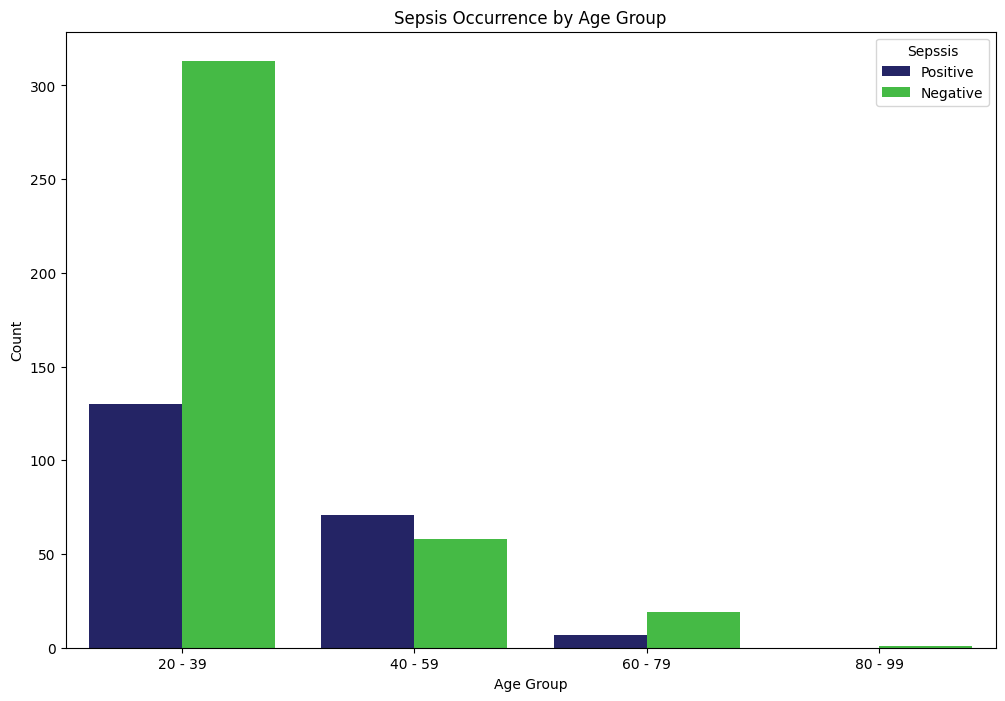

Age Group-wise Sepsis Occurrence Rates:
Sepssis    Sepsis_Rate
age_group             
20 - 39       0.293454
40 - 59       0.550388
60 - 79       0.269231
80 - 99       0.000000


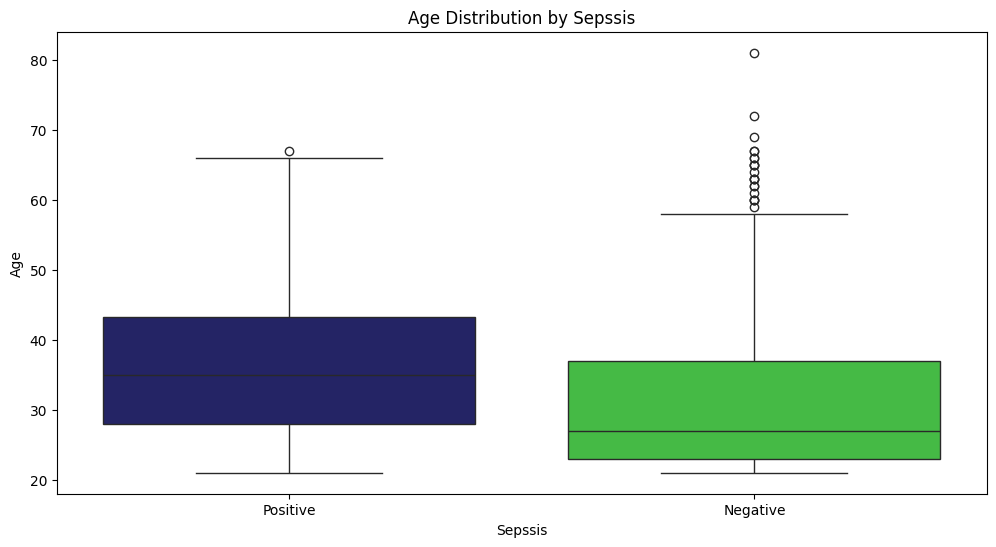

In [101]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', hue='Sepssis', palette=['midnightblue', 'limegreen'])
plt.title('Sepsis Occurrence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

age_group_counts = df.groupby(['age_group', 'Sepssis']).size().unstack()
age_group_counts['Sepsis_Rate'] = age_group_counts['Positive'] / (age_group_counts['Negative'] + age_group_counts['Positive'])

# Display the DataFrame showing sepsis occurrence rates in each age group
print("Age Group-wise Sepsis Occurrence Rates:")
print(age_group_counts[['Sepsis_Rate']])

# Step 3: Visualize age-related patterns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sepssis', y='Age', palette=['midnightblue', 'limegreen'])
plt.title('Age Distribution by Sepssis')
plt.xlabel('Sepssis')
plt.ylabel('Age')
plt.show()


__The highest rate observed in the '40 - 59' age group with 55%__

3. To what extent does the presence of insurance impact the likelihood of patients developing sepsis, and are there notable associations between insurance status and sepsis occurrence?

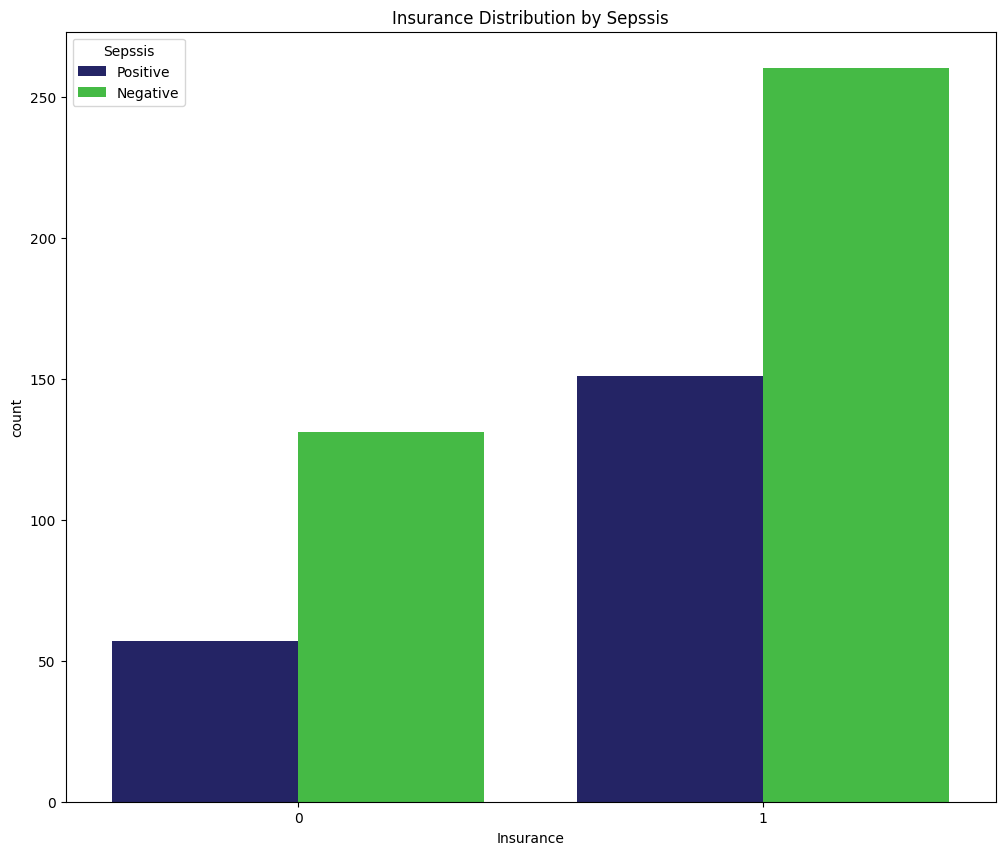

Chi-square value: 2.0712782081677066
P-value: 0.1500956791860619


In [102]:
# Analysis for insurance column in relation to sepsis column
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Insurance', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Insurance Distribution by Sepssis')
plt.show()

contingency_table = pd.crosstab(df['Insurance'], df['Sepssis'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")


__No significant association between insurance status and sepsis occurrence__

4. Is there a significant correlation between a patient's body mass and their susceptibility to sepsis, and can body mass be considered a potential risk factor for sepsis development?

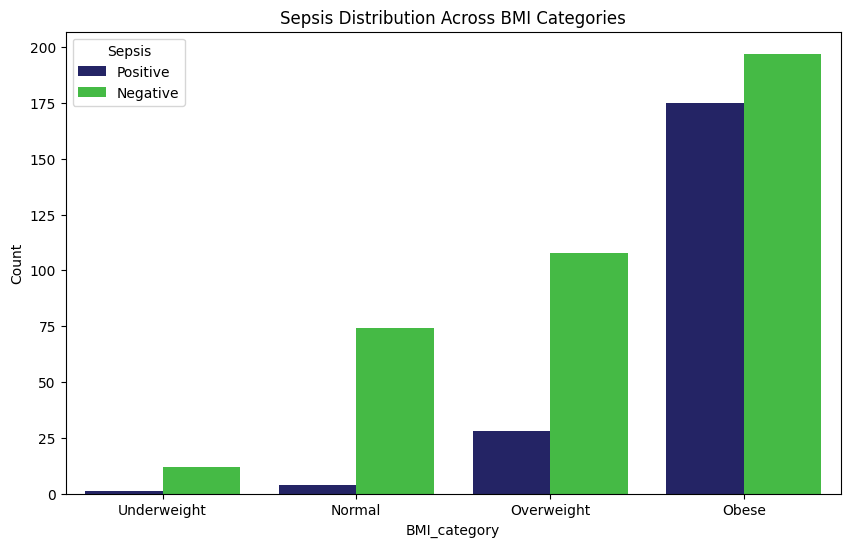

Chi-square value: 71.22805545724869
P-value: 2.3295048715621714e-15


In [103]:
# Create a countplot to visualize the distribution of sepsis across BMI categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BMI_category', hue='Sepssis', palette=['midnightblue', 'limegreen'])
plt.title('Sepsis Distribution Across BMI Categories')
plt.xlabel('BMI_category')
plt.ylabel('Count')
plt.legend(title='Sepsis')
plt.show()

contingency_table = pd.crosstab(df['BMI_category'], df['Sepssis'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")

__There is a significant correlation between a patient's body mass and their susceptibility to sepsis.__
__Body mass can be considered a potential risk factor for sepsis development.__

5. How do various blood parameters relate to the occurrence of sepsis, and can specific bloodwork results be indicative of an increased risk of developing sepsis?

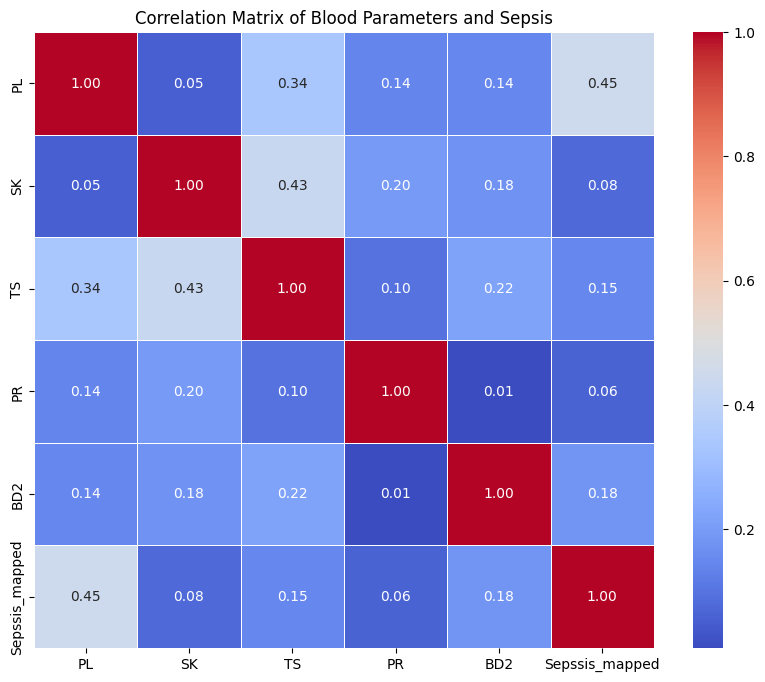

In [104]:
# Select relevant columns for blood parameters and sepsis
blood_columns = ['PL', 'SK', 'TS', 'PR', 'BD2', 'Sepssis_mapped']
blood_df = df[blood_columns]
# Calculate the correlation matrix
correlation_matrix = blood_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Blood Parameters and Sepsis')
plt.show()


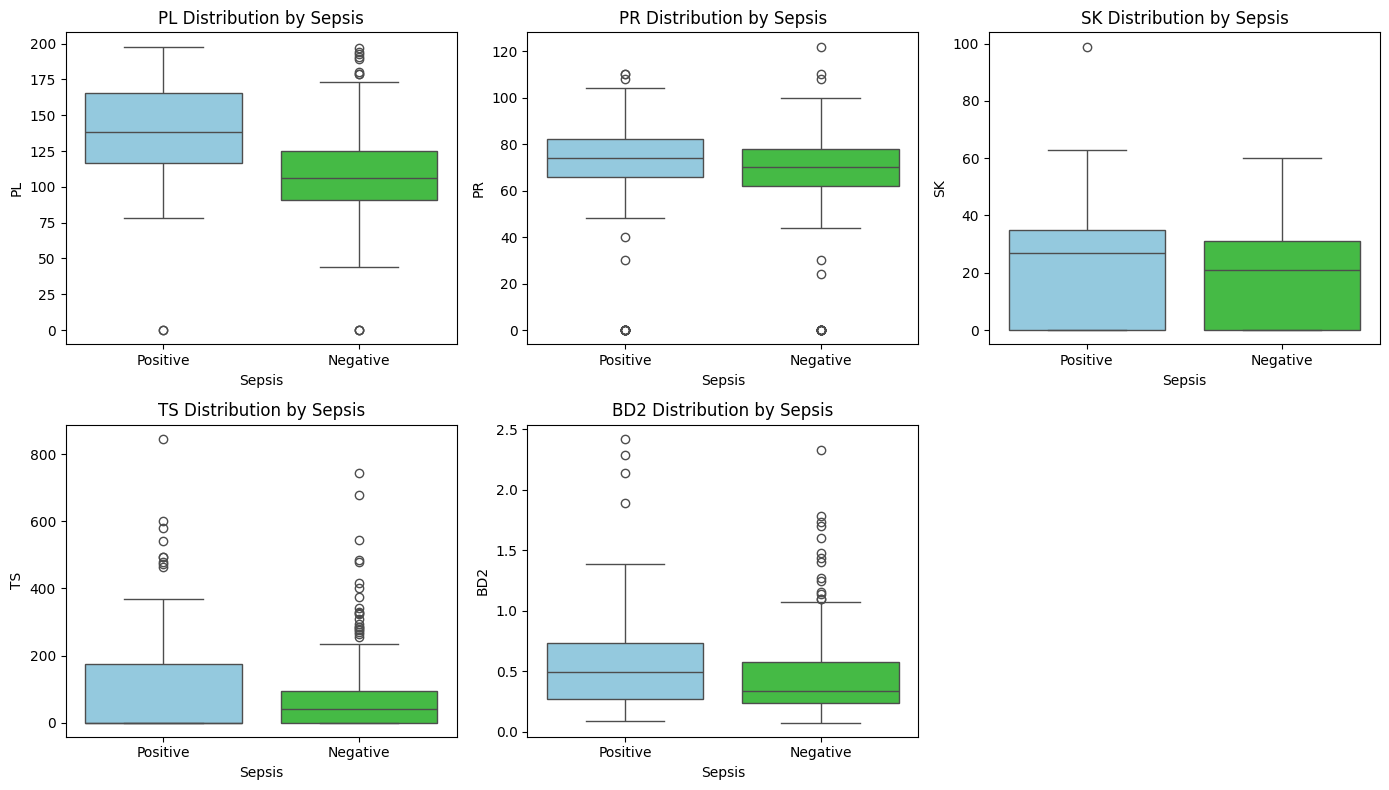

T-test results for PL:
T-statistic: 12.3025
P-value: 0.0000

T-test results for PR:
T-statistic: 1.4954
P-value: 0.1354

T-test results for SK:
T-statistic: 1.8521
P-value: 0.0645

T-test results for TS:
T-statistic: 3.6032
P-value: 0.0003

T-test results for BD2:
T-statistic: 4.5112
P-value: 0.0000



In [105]:
# Select relevant columns
blood_columns = ['PL', 'PR', 'SK', 'TS', 'BD2', 'Sepssis']
blood_df = df[blood_columns]

# Visualize distribution of blood parameters by Sepsis status
plt.figure(figsize=(14, 8))
for i, param in enumerate(['PL', 'PR', 'SK', 'TS', 'BD2']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Sepssis', y=param, data=blood_df,palette=['skyblue', 'limegreen'])
    plt.title(f'{param} Distribution by Sepsis')
    plt.xlabel('Sepsis')
    plt.ylabel(param)

plt.tight_layout()
plt.show()

# Perform t-tests to compare means of blood parameters between Positive and Negative sepsis cases
for param in ['PL', 'PR', 'SK', 'TS', 'BD2']:
    t_stat, p_value = ttest_ind(blood_df[blood_df['Sepssis'] == 'Positive'][param],
                                blood_df[blood_df['Sepssis'] == 'Negative'][param])

    print(f'T-test results for {param}:')
    print(f'T-statistic: {t_stat:.4f}')
    print(f'P-value: {p_value:.4f}\n')


## Blood Parameters and Sepsis Occurrence Analysis

The analysis of various blood parameters reveals intriguing insights into their relationship with the occurrence of sepsis. Below is a summary of the T-test results for each blood parameter:

1. **PL (Blood Work Result-1):**
   - **T-statistic:** 12.3025
   - **P-value:** 0.0000
   - **Conclusion:** There is a significant difference in PL levels between patients with Positive and Negative sepsis cases. Higher PL levels may be indicative of an increased risk of developing sepsis.

2. **PR (Blood Pressure):**
   - **T-statistic:** 1.4954
   - **P-value:** 0.1354
   - **Conclusion:** The difference in means for PR is not statistically significant. Blood pressure may not be a strong indicator of sepsis risk.

3. **SK (Blood Work Result-2):**
   - **T-statistic:** 1.8521
   - **P-value:** 0.0645
   - **Conclusion:** Although the P-value is relatively low, there is not enough evidence to conclude a significant relationship between SK levels and sepsis risk.

4. **TS (Blood Work Result-3):**
   - **T-statistic:** 3.6032
   - **P-value:** 0.0003
   - **Conclusion:** Significant differences in TS levels suggest a potential association with an increased risk of sepsis.

5. **BD2 (Blood Work Result-4):**
   - **T-statistic:** 4.5112
   - **P-value:** 0.0000
   - **Conclusion:** BD2 levels exhibit a highly significant difference, indicating a potential strong association with an increased risk of sepsis.

In summary, specific bloodwork results, particularly PL, TS, and BD2, show significant associations with the occurrence of sepsis. Higher levels of PL, TS, and BD2 may be indicative of an increased risk of developing sepsis. However, further clinical and statistical analyses are recommended to validate and explore these associations in-depth.

## Data Preparation

In [106]:
df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'age_group', 'BMI_category', 'Sepssis_mapped'],
      dtype='object')

In [107]:
df = df.drop(columns=['age_group','Sepssis_mapped','BMI_category','ID'], axis=1)

In [108]:
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


### Trim the outliers

In [109]:
numerical_features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Creating a copy of the DataFrame to preserve the original data
df_trim = df.copy()

# Calculating the IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Creating a mask to identify outliers
outlier_mask = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR)))

# Removing outliers
df_trim = df_trim[~outlier_mask.any(axis=1)]

# Display the shape of the cleaned dataset
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_trim.shape)

Original shape: (599, 10)
Shape after removing outliers: (493, 10)


In [110]:
# Define your features (X) and target variable (y)
X = df_trim.drop('Sepssis', axis=1)
y = df_trim['Sepssis']

### Create a pipeline

In [111]:
input_features = X.columns
preprocessor = ColumnTransformer(
    transformers= [
        ('scaler', StandardScaler(),input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)

In [112]:
# Check the class distribution in the training set before balancing
print("Class distribution before balancing:")
print(y.value_counts())

Class distribution before balancing:
Sepssis
Negative    337
Positive    156
Name: count, dtype: int64


In [113]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Check the class distribution after balancing
balanced_class_counts = y_train_resampled.value_counts()
print("\nClass distribution in the balanced training set:")
print(balanced_class_counts)


Class distribution in the balanced training set:
Sepssis
Positive    337
Negative    337
Name: count, dtype: int64


In [114]:
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)


print("Shape of the Training Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of the Evaluation Set (X_eval, y_eval):", X_eval.shape, y_eval.shape)

Shape of the Training Set (X_train, y_train): (539, 9) (539,)
Shape of the Evaluation Set (X_eval, y_eval): (135, 9) (135,)


In [115]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

In [116]:
print(y_eval_encoded)

[1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1]


## Modelling

### Logistic Regression

In [117]:
# List of models
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]

metrics = []

# Iterating over models
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_eval)

    # Calculate the metrics
    acc = accuracy_score(y_eval_encoded, y_pred)
    f1 = f1_score(y_eval_encoded, y_pred)
    roc = roc_auc_score(y_eval_encoded, y_pred)
    pr = precision_score(y_eval_encoded, y_pred)
    rc = recall_score(y_eval_encoded, y_pred)

    # Append the metrics to the list
    metrics.append({"Model": model.__class__.__name__,
                    "Accuracy Score": acc,
                    "F1 Score": f1,
                    "ROC AUC Score": roc,
                    "Precision Score": pr,
                    "Recall Score": rc})

# Creating a DataFrame for the overall performance
overall = pd.DataFrame(metrics)
overall = overall.sort_values(by="Accuracy Score", ascending=False)
overall_styled = overall.style.background_gradient(cmap="Spectral")
overall_styled

,Model,Accuracy Score,F1 Score,ROC AUC Score,Precision Score,Recall Score
3,RandomForestClassifier,0.874074,0.872180,0.874012,0.878788,0.865672
4,XGBClassifier,0.859259,0.861314,0.859416,0.842857,0.880597
5,GradientBoostingClassifier,0.822222,0.820896,0.822212,0.820896,0.820896
2,DecisionTreeClassifier,0.807407,0.803030,0.807287,0.815385,0.791045
6,AdaBoostClassifier,0.792593,0.777778,0.792142,0.830508,0.731343
1,GaussianNB,0.770370,0.755906,0.769974,0.800000,0.716418
0,SVC,0.762963,0.750000,0.762621,0.786885,0.716418
7,LogisticRegression,0.748148,0.734375,0.747805,0.770492,0.701493


In [118]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]

for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    # Fit the model
    pipeline.fit(X_train, y_train_encoded)

    # Predict on the test set
    y_pred = pipeline.predict(X_eval)

    # Print the classification report
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_eval_encoded, y_pred))

    # Generate and display the confusion matrix
    fig = px.imshow(confusion_matrix(y_eval_encoded, y_pred), color_continuous_scale='tropic',
                    title="Confusion Matrix of " + model.__class__.__name__,
                    labels=dict(x="Predicted", y="Actual", color="Counts"),
                    color_continuous_midpoint=0.8, width=400, height=400,
                    template="plotly_dark", text_auto=True)
    fig.show()

    print("----------------------------------------------------------")

Model:  SVC
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.81      0.77        68
           1       0.79      0.72      0.75        67

    accuracy                           0.76       135
   macro avg       0.77      0.76      0.76       135
weighted avg       0.76      0.76      0.76       135



----------------------------------------------------------
Model:  GaussianNB
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        68
           1       0.80      0.72      0.76        67

    accuracy                           0.77       135
   macro avg       0.77      0.77      0.77       135
weighted avg       0.77      0.77      0.77       135



----------------------------------------------------------
Model:  DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.82        68
           1       0.84      0.76      0.80        67

    accuracy                           0.81       135
   macro avg       0.81      0.81      0.81       135
weighted avg       0.81      0.81      0.81       135



----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.87      0.88      0.87        67

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135



----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        68
           1       0.84      0.88      0.86        67

    accuracy                           0.86       135
   macro avg       0.86      0.86      0.86       135
weighted avg       0.86      0.86      0.86       135



----------------------------------------------------------
Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        68
           1       0.82      0.82      0.82        67

    accuracy                           0.82       135
   macro avg       0.82      0.82      0.82       135
weighted avg       0.82      0.82      0.82       135



----------------------------------------------------------
Model:  AdaBoostClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.85      0.81        68
           1       0.83      0.73      0.78        67

    accuracy                           0.79       135
   macro avg       0.80      0.79      0.79       135
weighted avg       0.80      0.79      0.79       135



----------------------------------------------------------
Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        68
           1       0.77      0.70      0.73        67

    accuracy                           0.75       135
   macro avg       0.75      0.75      0.75       135
weighted avg       0.75      0.75      0.75       135



----------------------------------------------------------


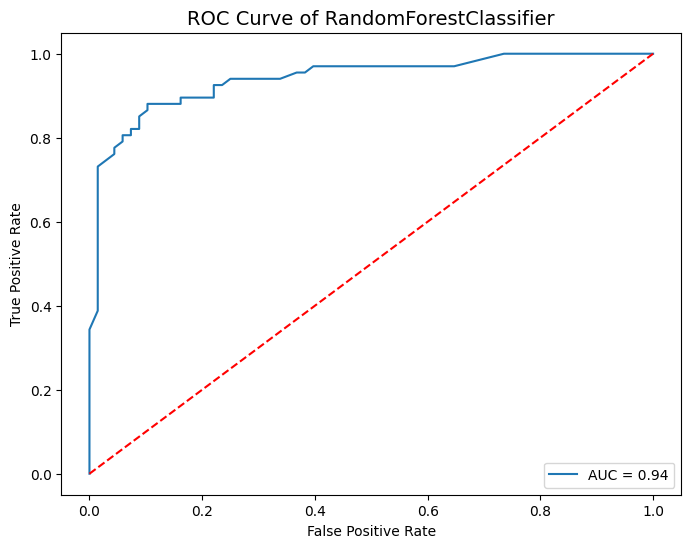

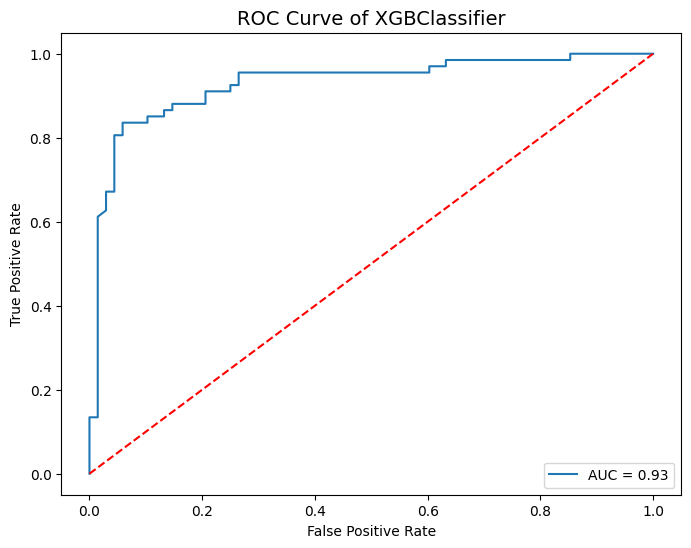

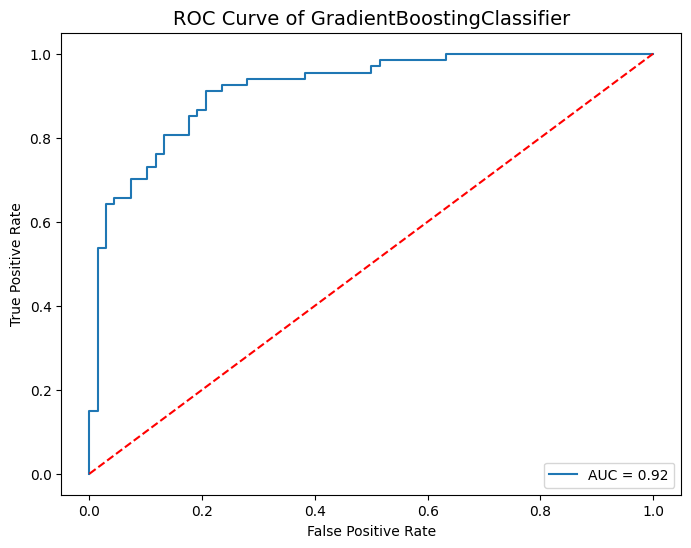

In [119]:
models =[RandomForestClassifier(), XGBClassifier(), GradientBoostingClassifier()]

for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    # Fit the model on your training data before making predictions
    pipeline.fit(X_train, y_train_encoded)
    
    # ROC Curve:
    y_prob = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc_score(y_eval_encoded, y_prob))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.legend(loc='lower right')
    plt.title("ROC Curve of " + model.__class__.__name__, size=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [120]:
# Define models
rfc = RandomForestClassifier()
xgb = XGBClassifier()

# Define hyperparameter grids for each model

rfc_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
# Create lists of models and their corresponding parameter grids
models = [rfc, xgb]
params = [rfc_params, xgb_params]

 #Perform grid search for each model
for model, param_grid in zip(models, params):
    grid_cv = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, verbose=2)
    grid_cv.fit(X_train, y_train_encoded)
    
    print(model.__class__.__name__, "Best params:", grid_cv.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth

In [121]:
# Final models:
rfc = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
xgb = XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=300)

models = [rfc,xgb]

overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","precision_score","recall_score"])
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
       
    ])
    pipeline.fit(X_train,y_train_encoded)
    y_pred=pipeline.predict(X_eval)
    acc=accuracy_score(y_eval_encoded,y_pred)
    f1=f1_score(y_eval_encoded,y_pred)
    roc=roc_auc_score(y_eval_encoded,y_pred)
    pr=precision_score(y_eval_encoded,y_pred)
    rc=recall_score(y_eval_encoded,y_pred)
    
    overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Spectral")
overral

,Model,Accuracy Score,F1 Score,ROC AUC Score,precision_score,recall_score
0,RandomForestClassifier,0.888889,0.887218,0.888828,0.893939,0.880597
1,XGBClassifier,0.851852,0.848485,0.851734,0.861538,0.835821


In [122]:
models = [rfc,xgb]
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_eval)
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_eval_encoded, y_pred))
    print("Model: ",model.__class__.__name__)
    fig=px.imshow(confusion_matrix(y_eval_encoded,y_pred),color_continuous_scale='tropic',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=400,height=400,template="plotly_dark",text_auto=True)
    fig.show()
    print("----------------------------------------------------------")

Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        68
           1       0.84      0.85      0.84        67

    accuracy                           0.84       135
   macro avg       0.84      0.84      0.84       135
weighted avg       0.84      0.84      0.84       135

Model:  RandomForestClassifier


----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86        68
           1       0.86      0.84      0.85        67

    accuracy                           0.85       135
   macro avg       0.85      0.85      0.85       135
weighted avg       0.85      0.85      0.85       135

Model:  XGBClassifier


----------------------------------------------------------


In [123]:
# Final models
rfc = RandomForestClassifier(bootstrap=True, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
xgb = XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=300)

models = [rfc, xgb]

# Create a list to store cross-validation results
cv_results = []

# Specify the cross-validation strategy (StratifiedKFold for classification)
cv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)

for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train_encoded, cv=cv, scoring='accuracy')
    
    # Store cross-validation results
    cv_results.append({
        'Model': model.__class__.__name__,
        'Cross-Validation Scores': scores
    })

# Display cross-validation results
for result in cv_results:
    print(f"Model: {result['Model']}")
    print(f"Cross-Validation Scores: {result['Cross-Validation Scores']}")
    print(f"Mean Accuracy: {result['Cross-Validation Scores'].mean():.4f}")
    print("----------------------------------------------------------")


Model: RandomForestClassifier
Cross-Validation Scores: [0.77777778 0.84259259 0.83333333 0.80555556 0.82242991]
Mean Accuracy: 0.8163
----------------------------------------------------------
Model: XGBClassifier
Cross-Validation Scores: [0.78703704 0.83333333 0.78703704 0.78703704 0.80373832]
Mean Accuracy: 0.7996
----------------------------------------------------------


## __Save the Pipeline & Encoder__

In [124]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [125]:
# Specify the absolute path to the "assets" folder
Assets = os.path.abspath('../data')

# Save the pipeline using joblib for RandomForestClassifier
rfc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rfc)
])
rfc_pipeline.fit(X_train, y_train_encoded)
joblib.dump(rfc_pipeline, os.path.join(Assets, f'{rfc.__class__.__name__}_pipeline.joblib'))

# Save the pipeline using joblib for XGBClassifier
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])
xgb_pipeline.fit(X_train, y_train_encoded)
joblib.dump(xgb_pipeline, os.path.join(Assets, f'{xgb.__class__.__name__}_pipeline.joblib'))

# Save the encoder using joblib in the "assets" folder
joblib.dump(encoder, os.path.join(Assets, 'encoder.joblib'))


['/home/florence/Desktop/LP6project/data/encoder.joblib']